In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13853.6787

Best Fitness:	1754.7761
Solution:	100.0000
Diff:		1654.7761

[0:03:22][----------] 1.96% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	11298.7463

Best Fitness:	3518.2788
Solution:	100.0000
Diff:		3418.2788

[0:06:24][----------] 3.92% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	14955.3373

Best Fitness:	2828.1935
Solution:	100.0000
Diff:		2728.1935

[0:09:22][#---------] 5.88% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	17069.5850

Best Fitness:	4431.8546
Solution:	100.0000
Diff:		4331.8546

[0:12:22][#---------] 7.84% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13619.2470

Best Fitness:	2118.0684
Solution:	100.0000
Diff:		2018.0684

[0:15:20][#---------] 9.80% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13710.5668

Best Fitness:	3757.7778
Solution:	100.0000
Diff:		3657.7778

[0:18:21][#---------] 11.76% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	19905.8464

Best Fitness:	5648.1185
Solution:	100.0000
Diff:		5548.1185

[0:21:23][#---------] 13.73% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	12654.1066

Best Fitness:	3199.7236
Solution:	100.0000
Diff:		3099.7236

[0:24:22][##--------] 15.69% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	24963.5953

Best Fitness:	6897.7961
Solution:	100.0000
Diff:		6797.7961

[0:27:22][##--------] 17.65% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13604.0889

Best Fitness:	3035.0780
Solution:	100.0000
Diff:		2935.0780

[0:30:01][##--------] 19.61% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9981.7089

Best Fitness:	2592.2586
Solution:	100.0000
Diff:		2492.2586

[0:32:39][##--------] 21.57% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	14237.1646

Best Fitness:	4304.5483
Solution:	100.0000
Diff:		4204.5483

[0:35:18][##--------] 23.53% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	16159.6506

Best Fitness:	4752.0471
Solution:	100.0000
Diff:		4652.0471

[0:37:58][###-------] 25.49% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	40837.3456

Best Fitness:	8330.2410
Solution:	100.0000
Diff:		8230.2410

[0:40:37][###-------] 27.45% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	27462.8531

Best Fitness:	7248.0166
Solution:	100.0000
Diff:		7148.0166

[0:43:15][###-------] 29.41% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	29952.3164

Best Fitness:	9178.3312
Solution:	100.0000
Diff:		9078.3312

[0:45:53][###-------] 31.37% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13281.6671

Best Fitness:	3011.3661
Solution:	100.0000
Diff:		2911.3661

[0:48:34][###-------] 33.33% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	14436.2443

Best Fitness:	2575.5981
Solution:	100.0000
Diff:		2475.5981

[0:51:17][####------] 35.29% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10116.4570

Best Fitness:	2302.1271
Solution:	100.0000
Diff:		2202.1271

[0:53:59][####------] 37.25% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	16137.4709

Best Fitness:	3857.1579
Solution:	100.0000
Diff:		3757.1579

[0:56:37][####------] 39.22% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	26213.7601

Best Fitness:	4059.6405
Solution:	100.0000
Diff:		3959.6405

[0:58:59][####------] 41.18% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9462.0510

Best Fitness:	2472.3433
Solution:	100.0000
Diff:		2372.3433

[1:01:22][####------] 43.14% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13715.6893

Best Fitness:	3161.9161
Solution:	100.0000
Diff:		3061.9161

[1:03:43][#####-----] 45.10% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8787.9043

Best Fitness:	1289.7273
Solution:	100.0000
Diff:		1189.7273

[1:06:04][#####-----] 47.06% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	15908.4089

Best Fitness:	2665.5419
Solution:	100.0000
Diff:		2565.5419

[1:08:28][#####-----] 49.02% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	19265.9307

Best Fitness:	5903.1167
Solution:	100.0000
Diff:		5803.1167

[1:10:48][#####-----] 50.98% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	22690.8421

Best Fitness:	3367.6668
Solution:	100.0000
Diff:		3267.6668

[1:13:09][#####-----] 52.94% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	18618.3581

Best Fitness:	2236.5490
Solution:	100.0000
Diff:		2136.5490

[1:15:30][#####-----] 54.90% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8824.6740

Best Fitness:	1840.4811
Solution:	100.0000
Diff:		1740.4811

[1:17:52][######----] 56.86% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6702.7895

Best Fitness:	1768.3142
Solution:	100.0000
Diff:		1668.3142

[1:20:11][######----] 58.82% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	25638.6976

Best Fitness:	6501.6281
Solution:	100.0000
Diff:		6401.6281

[1:22:24][######----] 60.78% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	6257.4264

Best Fitness:	965.2628
Solution:	100.0000
Diff:		865.2628

[1:24:30][######----] 62.75% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	16072.3149

Best Fitness:	3150.4897
Solution:	100.0000
Diff:		3050.4897

[1:26:40][######----] 64.71% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9306.7083

Best Fitness:	1749.2956
Solution:	100.0000
Diff:		1649.2956

[1:28:45][#######---] 66.67% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	5579.9541

Best Fitness:	1452.5408
Solution:	100.0000
Diff:		1352.5408

[1:30:49][#######---] 68.63% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	14589.0253

Best Fitness:	3060.1641
Solution:	100.0000
Diff:		2960.1641

[1:32:53][#######---] 70.59% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10637.6979

Best Fitness:	3267.1794
Solution:	100.0000
Diff:		3167.1794

[1:34:57][#######---] 72.55% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10673.1641

Best Fitness:	3671.1443
Solution:	100.0000
Diff:		3571.1443

[1:37:02][#######---] 74.51% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10935.0636

Best Fitness:	2096.0581
Solution:	100.0000
Diff:		1996.0581

[1:39:06][########--] 76.47% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	11211.9395

Best Fitness:	2501.6797
Solution:	100.0000
Diff:		2401.6797

[1:41:15][########--] 78.43% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	26187.9318

Best Fitness:	4884.7615
Solution:	100.0000
Diff:		4784.7615

[1:43:17][########--] 80.39% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	9378.6639

Best Fitness:	2198.5021
Solution:	100.0000
Diff:		2098.5021

[1:45:09][########--] 82.35% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	22629.7398

Best Fitness:	6965.1060
Solution:	100.0000
Diff:		6865.1060

[1:46:59][########--] 84.31% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	7056.9316

Best Fitness:	1595.6463
Solution:	100.0000
Diff:		1495.6463

[1:48:49][#########-] 86.27% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	13995.6252

Best Fitness:	3024.7744
Solution:	100.0000
Diff:		2924.7744

[1:50:39][#########-] 88.24% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	21460.9040

Best Fitness:	4175.6670
Solution:	100.0000
Diff:		4075.6670

[1:52:29][#########-] 90.20% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	8587.7536

Best Fitness:	1621.8087
Solution:	100.0000
Diff:		1521.8087

[1:54:19][#########-] 92.16% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	16250.3309

Best Fitness:	3990.3267
Solution:	100.0000
Diff:		3890.3267

[1:56:09][#########-] 94.12% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	10893.0652

Best Fitness:	2480.8492
Solution:	100.0000
Diff:		2380.8492

[1:57:59][##########] 96.08% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	11571.7003

Best Fitness:	1806.4291
Solution:	100.0000
Diff:		1706.4291

[1:59:47][##########] 98.04% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	15491.0281

Best Fitness:	4345.1483
Solution:	100.0000
Diff:		4245.1483

[2:01:39][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:01:39

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
160,22266.081051,18689.504700,16449.901771,18665.865566,11504.779449,16528.417389,17929.593745,14051.359768,18097.093879,13714.59524,...,20699.226505,28833.621355,12405.473131,25385.353648,13512.061386,15991.95189,10961.762034,16950.658294,13800.419309,50
161,22266.081051,12735.073083,16449.901771,18665.865566,11504.779449,16528.417389,17929.593745,14051.359768,18097.093879,13714.59524,...,17755.495457,28833.621355,12405.473131,25385.353648,13512.061386,15991.95189,9813.768227,16950.658294,13800.419309,50
162,21821.462326,12735.073083,16449.901771,18665.865566,11504.779449,16528.417389,17929.593745,14051.359768,18097.093879,13714.59524,...,17755.495457,13046.363727,12405.473131,25385.353648,13512.061386,15991.95189,9813.768227,14683.320349,13800.419309,50
163,21821.462326,12735.073083,16449.901771,15013.011914,11504.779449,16528.417389,17929.593745,12679.727695,13464.983428,13714.59524,...,17755.495457,13046.363727,12405.473131,19614.336880,13512.061386,15991.95189,9813.768227,14683.320349,13800.419309,50
164,21821.462326,12735.073083,16449.901771,13003.547089,11504.779449,16528.417389,17929.593745,12679.727695,13464.983428,13714.59524,...,17755.495457,13046.363727,12405.473131,19614.336880,13512.061386,15991.95189,9813.768227,14683.320349,13800.419309,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1654.7760827216866

Best error for run 1: 3418.2788415418927

Best error for run 2: 2728.193486981356

Best error for run 3: 4331.854575842481

Best error for run 4: 2018.0683670234985

Best error for run 5: 3657.777779939648

Best error for run 6: 5548.11847050624

Best error for run 7: 3099.723620317117

Best error for run 8: 6797.79607675882

Best error for run 9: 2935.0779635311296

Best error for run 10: 2492.2586010801997

Best error for run 11: 4204.548276145594

Best error for run 12: 4652.047062842982

Best error for run 13: 8230.24097012068

Best error for run 14: 7148.016553970932

Best error for run 15: 9078.331249456516

Best error for run 16: 2911.3660553482437

Best error for run 17: 2475.5980973045484

Best error for run 18: 2202.127111387267

Best error for run 19: 3757.1578676163444

Best error for run 20: 3959.640470165737

Best error for run 21: 2372.3432985885424

Best error for run 22: 3061.9160676156393

Best error for run 23: 1189.7273038108067

Best error for run 24: 2565.5419227858906

Best error for run 25: 5803.116652416324

Best error for run 26: 3267.666773480402

Best error for run 27: 2136.5489808585953

Best error for run 28: 1740.4811233729035

Best error for run 29: 1668.314170151188

Best error for run 30: 6401.628057306438

Best error for run 31: 865.2627827512983

Best error for run 32: 3050.48973473246

Best error for run 33: 1649.295617455071

Best error for run 34: 1352.5408278640487

Best error for run 35: 2960.1641409893678

Best error for run 36: 3167.1794136993267

Best error for run 37: 3571.1443310332133

Best error for run 38: 1996.0580994740521

Best error for run 39: 2401.6797027369257

Best error for run 40: 4784.761473995655

Best error for run 41: 2098.502059573505

Best error for run 42: 6865.105956175969

Best error for run 43: 1495.6462858196257

Best error for run 44: 2924.774379268353

Best error for run 45: 4075.667010609266

Best error for run 46: 1521.8086851536716

Best error for run 47: 3890.3266525860595

Best error for run 48: 2380.849185861058

Best error for run 49: 1706.429108487282

Best error for run 50: 4245.148334382747

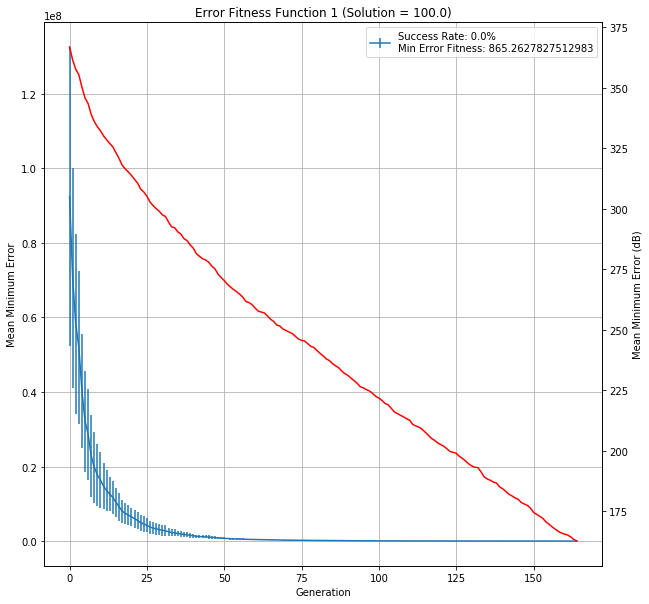

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.5,1654.776083,3418.278842,2728.193487,4331.854576,2018.068367,3657.77778,...,2924.774379,4075.667011,1521.808685,3890.326653,2380.849186,1706.429108,4245.148334,3421.786583,2:01:39,50100
